# Project Data Science 



## Main Problem 

Based on statistics from global food security reports, 8 out of 10 ASEAN countries face significant levels of food insecurity. Out of these 8 countries, 5 have over 20% of their population experiencing severe food insecurity, where people are frequently unable to access enough food to lead an active and healthy life. 

## Questions To Answers

1. **ASEAN Country Analysis of Severe Food Insecurity**

   Which ASEAN country suffers from food insecurity the most?

   To understand the prevalence and progression of severe food insecurity in ASEAN countries, highlighting the most affected areas.

2. **Causes for Food Insecurity To be Severe in ASEAN**

   What are the relationship between the potential causes of food insecurity?

   To identify what have been causing food insecurity to be so dire.

3. **Relationship Between Food Insecurity Levels to Health and Nutrition**

   Is there a correlation between health and nutrition and food insecurity?

   To find out how food insecurity could threathen the health

5. **Food Insecurity Trends Prediction**

   What are the predicted trends for food insecurity in ASEAN countries over the next decade, considering current data and potential influencing factors?

   To forecast future food insecurity levels in ASEAN countries using current data and trend analysis, helping policymakers prepare for and mitigate potential food security challenges.

In [1]:
#importing necessary stuff to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Food Insecurity ASEAN Overview

In [2]:
#read the original dataset(food insecurity ASEAN.csv)
uncleaned = pd.read_csv('food insecurity ASEAN.csv')
uncleaned.head()

Domain Code                             Domain  Area Code (M49)  \
0          FS  Suite of Food Security Indicators               96   
1          FS  Suite of Food Security Indicators               96   
2          FS  Suite of Food Security Indicators               96   
3          FS  Suite of Food Security Indicators               96   
4          FS  Suite of Food Security Indicators               96   

                Area  Element Code Element Item Code  \
0  Brunei Darussalam          6126   Value     22013   
1  Brunei Darussalam          6126   Value     22013   
2  Brunei Darussalam          6126   Value     22013   
3  Brunei Darussalam          6126   Value     22013   
4  Brunei Darussalam          6126   Value     22013   

                                                Item  Year Code  Year  \
0  Gross domestic product per capita, PPP, (const...       2002  2002   
1  Gross domestic product per capita, PPP, (const...       2003  2003   
2  Gross domestic product per capita, PPP, (const...       2004  2004   
3  Gross domestic product per capita, PPP, (const...       2005  2005   
4  Gross domestic product per capita, PPP, (const...       2006  2006   

       Unit    Value Flag                         Flag Description Note  
0  Int$/cap  70631.9    X  Figure from international organizations  NaN  
1  Int$/cap  71331.8    X  Figure from international organizations  NaN  
2  Int$/cap  70415.4    X  Figure from international organizations  NaN  
3  Int$/cap  69482.4    X  Figure from international organizations  NaN  
4  Int$/cap  71352.9    X  Figure from international organizations  NaN

## Data Pre-Processing 

In [3]:
#set a new variable for the dataset to be read
cleaned = pd.read_csv('food insecurity ASEAN.csv')

#drop unnecessary columns
def drop_columns(cleaned):
    return cleaned.drop(columns=['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Element', 'Item Code',
             'Year Code', 'Flag', 'Flag Description', 'Note'], axis=1)

#ensure the 'Value' column is numeric
cleaned['Value'] = pd.to_numeric(cleaned['Value'], errors='coerce')

#remove rows with NAN values in column 'Value'
def drop_null(cleaned):
    check_null = ['Value']
    cleaned = cleaned[cleaned['Value'] != 0]
    return cleaned.dropna(subset=check_null)

#cleaned data
cd = cleaned.pipe(drop_columns).pipe(drop_null)
# Reset index
cd = cd.reset_index(drop=True)

#save cleaned dataframe into a csv file 
cd.to_csv('Cleaned Food Insecurity ASEAN.csv', index=False)
cd

Area                                               Item  \
0     Brunei Darussalam  Gross domestic product per capita, PPP, (const...   
1     Brunei Darussalam  Gross domestic product per capita, PPP, (const...   
2     Brunei Darussalam  Gross domestic product per capita, PPP, (const...   
3     Brunei Darussalam  Gross domestic product per capita, PPP, (const...   
4     Brunei Darussalam  Gross domestic product per capita, PPP, (const...   
...                 ...                                                ...   
3370           Viet Nam  Minimum dietary energy requirement  (kcal/cap/...   
3371           Viet Nam  Minimum dietary energy requirement  (kcal/cap/...   
3372           Viet Nam  Minimum dietary energy requirement  (kcal/cap/...   
3373           Viet Nam  Minimum dietary energy requirement  (kcal/cap/...   
3374           Viet Nam  Minimum dietary energy requirement  (kcal/cap/...   

      Year        Unit    Value  
0     2002    Int$/cap  70631.9  
1     2003    Int$/cap  71331.8  
2     2004    Int$/cap  70415.4  
3     2005    Int$/cap  69482.4  
4     2006    Int$/cap  71352.9  
...    ...         ...      ...  
3370  2018  kcal/cap/d   1783.0  
3371  2019  kcal/cap/d   1783.0  
3372  2020  kcal/cap/d   1783.0  
3373  2021  kcal/cap/d   1784.0  
3374  2022  kcal/cap/d   1784.0  

[3375 rows x 5 columns]

## 1. ASEAN Country Analysis of Severe Food Insecurity

Food Insecurity in Total Population Rank:
Area
Philippines                        4,950,000
Cambodia                           2,342,857
Indonesia                          2,175,000
Malaysia                           2,171,429
Myanmar                            1,888,889
Viet Nam                             733,333
Thailand                             590,476
Lao People's Democratic Republic     588,889
Singapore                            100,000
Name: Value, dtype: float64

Food Insecurity in Male Population Rank:
Area
Philippines                        1,808,333
Malaysia                             971,429
Indonesia                            786,667
Cambodia                             652,381
Myanmar                              566,667
Viet Nam                             300,000
Thailand                             233,333
Lao People's Democratic Republic     166,667
Name: Value, dtype: float64

Food Insecurity in Female Population Rank:
Area
Philippines                        1

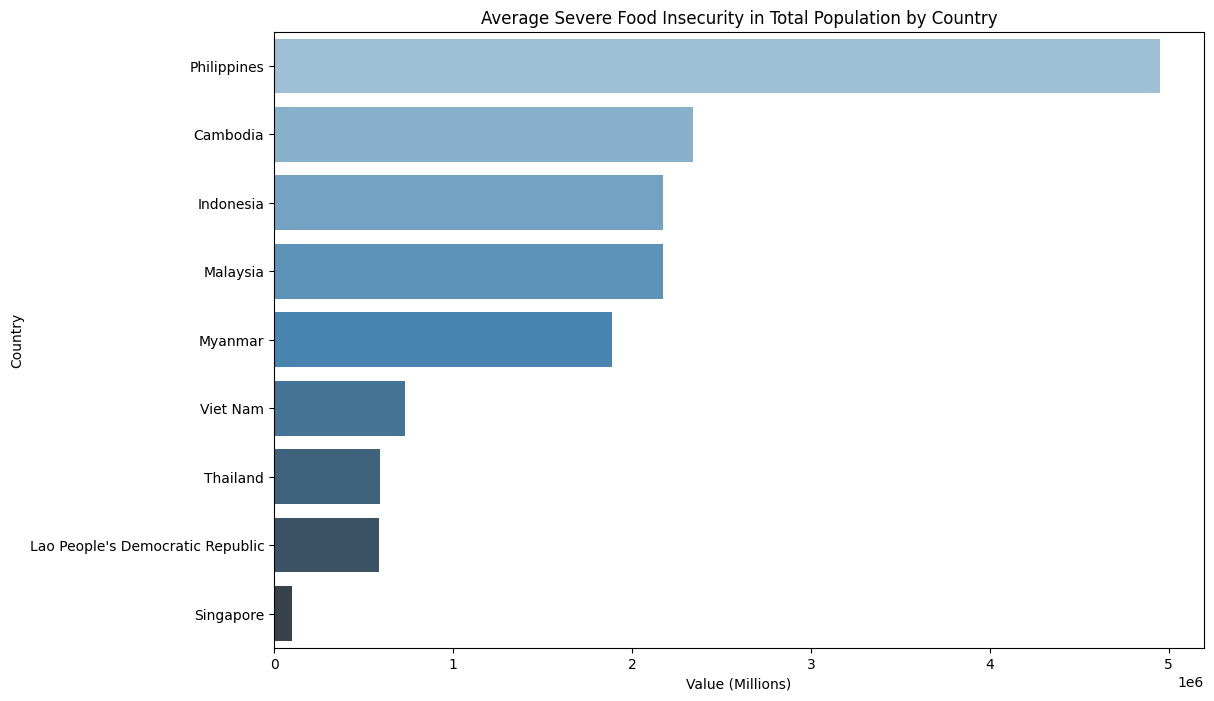

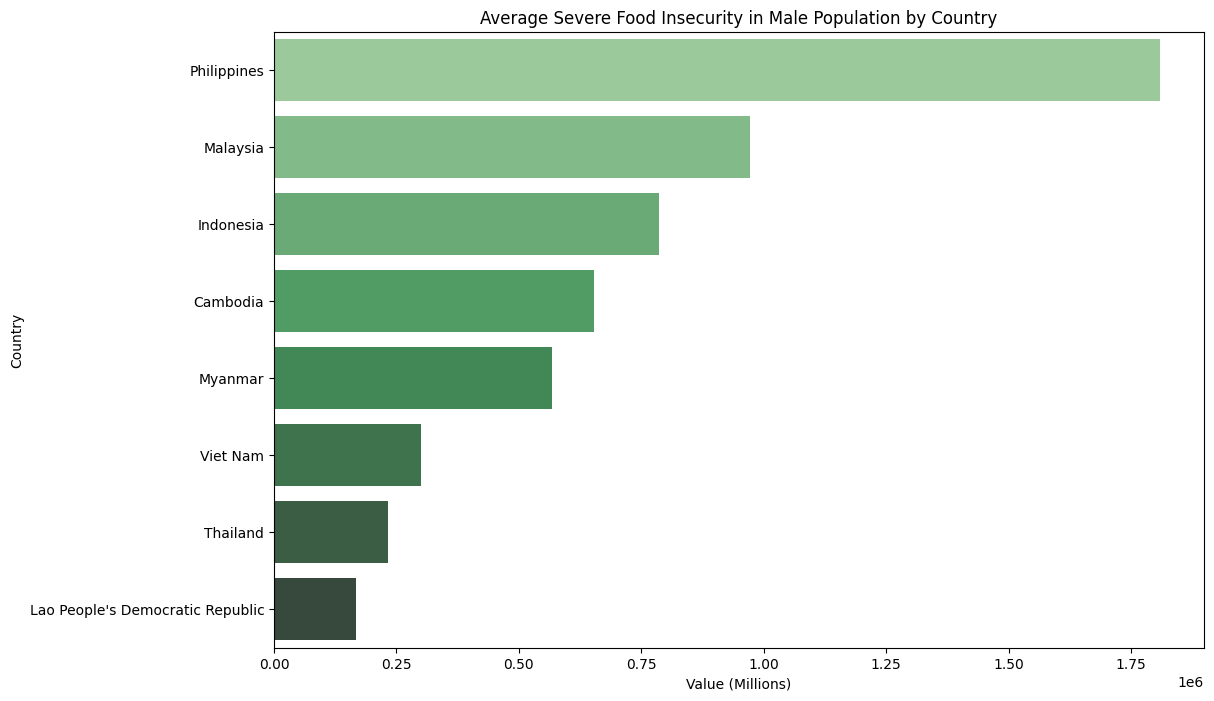

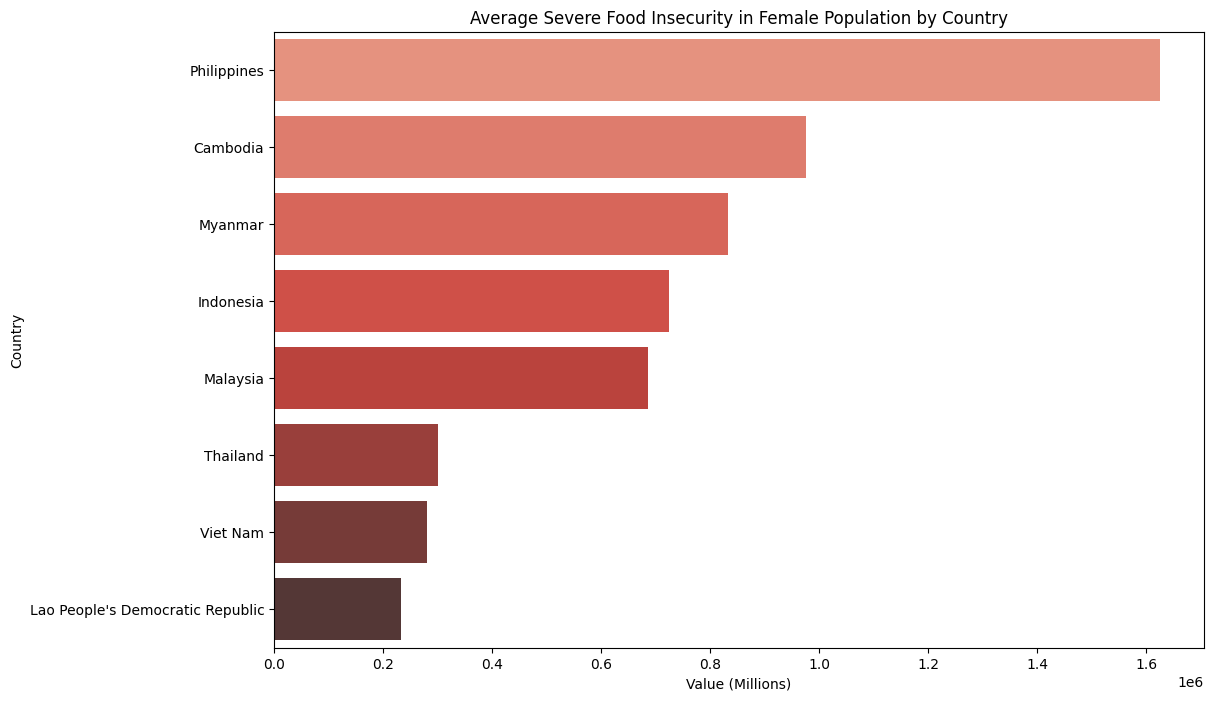

In [5]:
#use new variable to start analysing cleaned dataset
df = pd.read_csv('Cleaned Food Insecurity ASEAN.csv')

#call specific item from "Item" column
FI_total = df[df['Item'] == 'Number of severely food insecure people (million) (3-year average)']
FI_male = df[df['Item'] == 'Number of severely food insecure male adults (million) (3-year average)']
FI_female = df[df['Item'] == 'Number of severely food insecure female adults (million) (3-year average)']

#convert the value to million (according from the "Unit" column)
FI_total.loc[:, 'Value'] *= 1000000
FI_male.loc[:, 'Value'] *= 1000000
FI_female.loc[:, 'Value'] *= 1000000

#arrange them by value
FI_total_rank = FI_total.groupby('Area')['Value'].mean().sort_values(ascending=False)
FI_male_rank = FI_male.groupby('Area')['Value'].mean().sort_values(ascending=False)
FI_female_rank = FI_female.groupby('Area')['Value'].mean().sort_values(ascending=False)

pd.options.display.float_format = '{:,.0f}'.format

print("Food Insecurity in Total Population Rank:")
print(FI_total_rank)

print("\nFood Insecurity in Male Population Rank:")
print(FI_male_rank)

print("\nFood Insecurity in Female Population Rank:")
print(FI_female_rank)

#plotting bar plots for visualizations 
plt.figure(figsize=(12, 8))
sns.barplot(x=FI_total_rank.values, y=FI_total_rank.index, hue=FI_total_rank.index, palette='Blues_d', dodge=False, legend=False)
plt.xlabel('Value (Millions)')
plt.ylabel('Country')
plt.title('Average Severe Food Insecurity in Total Population by Country')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x=FI_male_rank.values, y=FI_male_rank.index, hue=FI_male_rank.index, palette='Greens_d', dodge=False, legend=False)
plt.xlabel('Value (Millions)')
plt.ylabel('Country')
plt.title('Average Severe Food Insecurity in Male Population by Country')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x=FI_female_rank.values, y=FI_female_rank.index, hue=FI_female_rank.index, palette='Reds_d', dodge=False, legend=False)
plt.xlabel('Value (Millions)')
plt.ylabel('Country')
plt.title('Average Severe Food Insecurity in Female Population by Country')
plt.show()

### Analysis and Insights

This analysis explores the levels of severe food insecurity among the total population, male population, and female population in the 10 ASEAN countries using data obtained from Food and Agriculture Organizations of the United Nations, FAOSTAT. We used bar charts to visualize the data. The analysis shows that 8 out of 10 countries face severe food insecurity.

Based on the bar charts, it can be seen that Brunei Darussalam has an overall of zero cases of severe food insecurity. On the other hand, Philippines has the highest number of cases of average severe food insecurity in all three populations. Aside from Brunei Darussalam, Singapore also has a low number of overall severely food insecure population. Following the Philippines, Cambodia has the second highest number of severely food insecure total population, with the female population being higher than the male population. Indonesia and Malaysia have similar levels of average severe food insecurity in their total population, with Indonesia being slightly higher. However, Malaysia has a higher level of severely food insecure male population than Indonesia. Myanmar ranks fourth in the average severe food insecurity in total population, but the country has the third highest number of severely food insecure female population. Vietnam, Thailand, and Laos have a significantly lower number of cases of severe food isnecurity in all three categories of population, with Laos being the third lowest after Brunei Darussalam and Singapore.

Higher female population of average severe food insecurity tend to have higher levels of average severe food insecurity in the corresponsing country's total population. From this, it can be concluded that the total population facing average severe food insecurity in ASEAN countries consists of more females than males.


### Implications 

Addressing food insecurity in underdeveloped countries such as the Philippines, Cambodia, Indonesia, Malaysia, and Myanmar can lead to significant health improvement in local communities and increased productivity. Lower average severe food insecurity rates among ASEAN populations will drive economic growth, reduce poverty, and enhance political stability.

Cross Validation R2: -0.4993483095438906
[ 806262.79349789  974590.93548486 1902191.23242349]
Cross Validation MAE: 1227681.65380208
R2 Score on test set: -0.018676574800637002
Mean Absolute Error on test set: 1336375.074008289


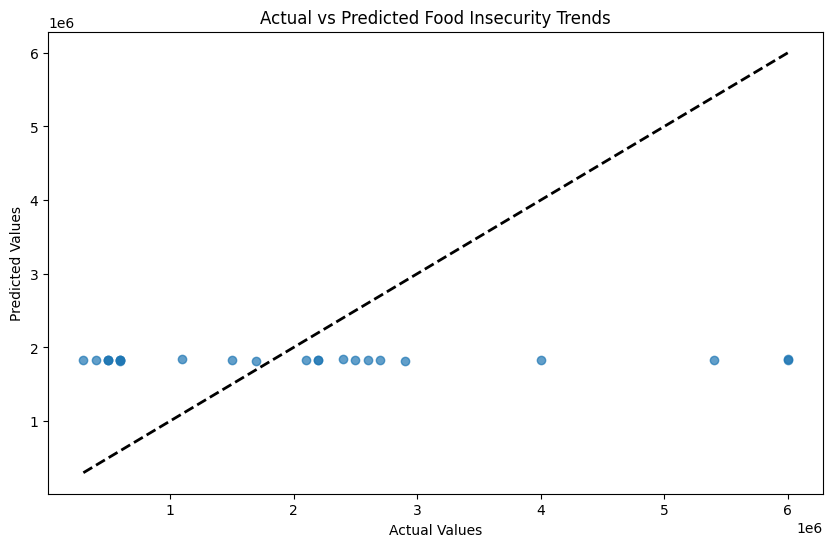

      Coefficient
Year        6,601


In [6]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler

#convert the 'Year' column to strings and then extract the middle year (since its in interval of 3 years)
FI_total.loc[:, 'Year'] = FI_total['Year'].astype(str).apply(lambda x: int(x.split('-')[0]) + 1)

#features and target
X = FI_total[['Year']]
y = FI_total['Value']

#standardized the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#cross validation
regmodel = LinearRegression()

#cross validate for R2
cv_results_r2 = cross_validate(regmodel, X_scaled, y, cv=3, return_train_score=False)
cv_r2 = cv_results_r2['test_score'].mean()
print(f'Cross Validation R2: {cv_r2}')

#cross validate for MAE
mae_scorer = make_scorer(mean_absolute_error)
cv_results_mae = cross_validate(regmodel, X_scaled, y, cv=3, scoring=mae_scorer, return_train_score=False)
print(cv_results_mae['test_score'])
cv_mae = cv_results_mae['test_score'].mean()
print(f'Cross Validation MAE: {cv_mae}')

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

#train the linear regression model
reg = LinearRegression().fit(X_train, y_train)

#make predictions
y_pred = reg.predict(X_test)

#evaluate the model
r2 = r2_score(y_test, y_pred)
print(f'R2 Score on test set: {r2}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on test set: {mae}')

#visualize predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Food Insecurity Trends')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

#coefficients analysis
features = ['Year']
coefficients = pd.DataFrame(reg.coef_, features, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients)

### Analysis and Insights

A scatter plot is used to visualize the comparison between the actual values of food insecurity trends versus the predicted values of food insecurity trends. The predicted values are obtained using a linear regression model to predict the food insecurity trends by year, with the values being validated by the model's R2 score and Mean Absolute Error (MAE). The scatter plot displays the actual food insecurtiy trends' values on the x-axis and the predicted values on the y-axis. Each point represents an ASEAN country. The diagonal line acts as a decision boundary to assess how closely the predicted values match the actual values.

Most points are scattered straight along the x-axis of the plotted graph, the values not aligning with the diagonal line and mostly falling under the line. Therefore, the linear regression model is inaccurate in predicting the food insecurity trends in ASEAN countries, most of the time underestimating the food insecurity values.

### Implications 

Underestimation of food insecurity values by the linear regression model could lead to significant misallocation of resources, which may hvae severe consequences for vulnerable populations such as low-income families, children, and the elderly. Lack of necessary assistance may lead to deteriorating health and nutrition outcomes. Hence, there is a need to improve the predictive model by incorporating additional relevant variables and a more comprehensive data collection to ensure effective strategies and policies are made to combat food insecurity.


## 2. Causes for Food Insecurity To be Severe in ASEAN

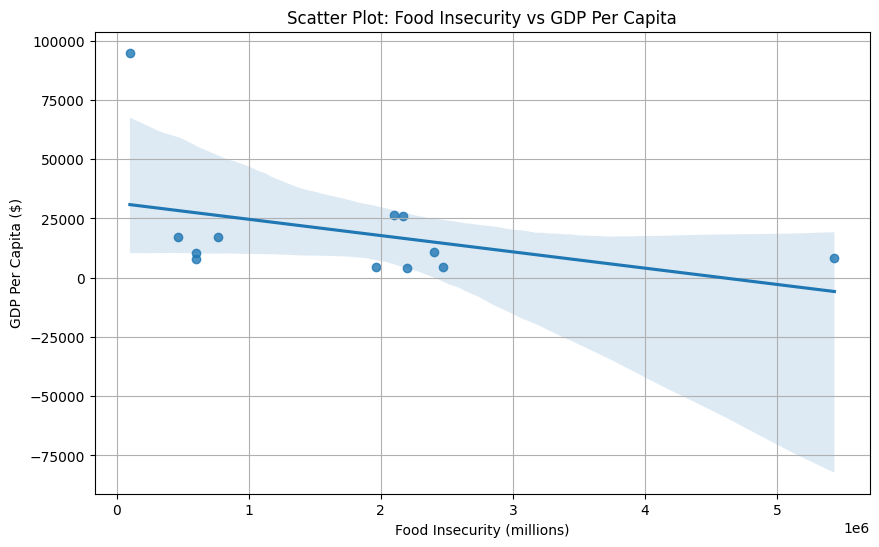

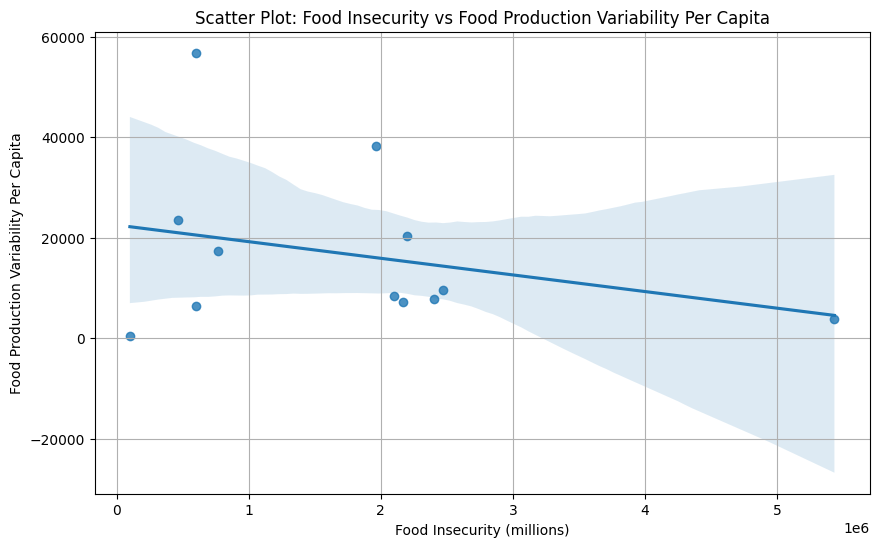

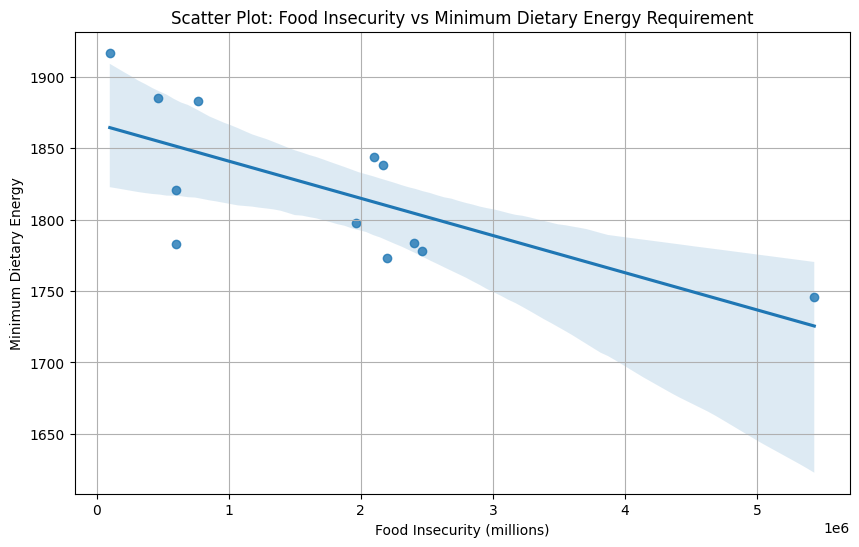

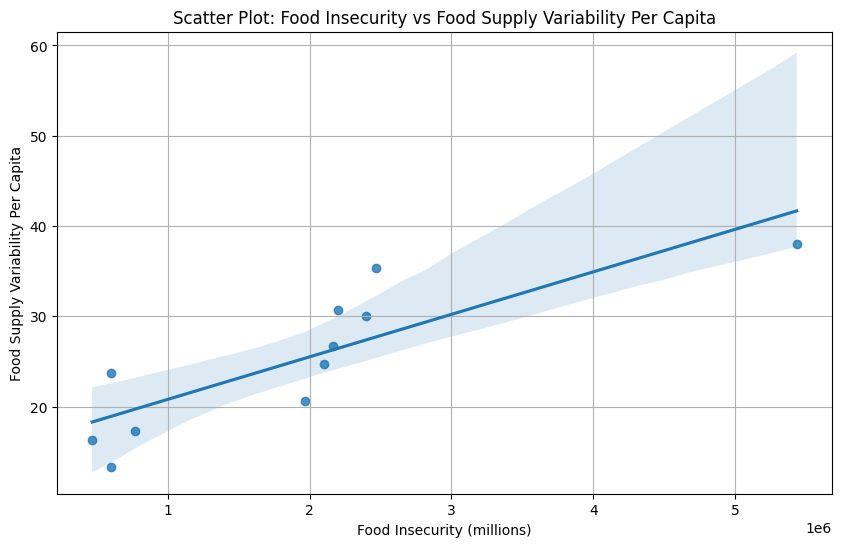

In [7]:
df2 = pd.read_csv('Cleaned Food Insecurity ASEAN.csv')

#call specific item from column "Item"
food_insecurity = df2[df2['Item'] == 'Number of severely food insecure people (million) (3-year average)']
gdp = df2[df2['Item'] == 'Gross domestic product per capita, PPP, (constant 2017 international $)']
food_prod_var = df2[df2['Item'] == 'Per capita food production variability (constant 2014-2016 thousand int$ per capita)']
min_diet = df2[df2['Item'] == 'Minimum dietary energy requirement  (kcal/cap/day)']
food_supply_var = df2[df2['Item'] == 'Per capita food supply variability (kcal/cap/day)']

#convert its value by its unit value
food_insecurity.loc[:, 'Value'] *= 1000000
food_prod_var.loc[:, 'Value'] *= 1000

#ensure 'Year' column is of integer type
gdp = gdp.copy() 
gdp.loc[:, 'Year'] = gdp['Year'].astype(int)
food_prod_var = food_prod_var.copy() 
food_prod_var.loc[:, 'Year'] = food_prod_var['Year'].astype(int)
min_diet = min_diet.copy() 
min_diet.loc[:, 'Year'] = min_diet['Year'].astype(int)
food_supply_var = food_supply_var.copy() 
food_supply_var.loc[:, 'Year'] = food_supply_var['Year'].astype(int)

#group data by 'Area' and 'Year' for each item
gdp_grouped = gdp.groupby(['Area', 'Year'])['Value'].mean().reset_index()
food_prod_var_grouped = food_prod_var.groupby(['Area', 'Year'])['Value'].mean().reset_index()
min_diet_grouped = min_diet.groupby(['Area', 'Year'])['Value'].mean().reset_index()
food_supply_var_grouped = food_supply_var.groupby(['Area', 'Year'])['Value'].mean().reset_index()

#create a function to convert year to 3-year interval
def year_to_interval(year):
    if 2001 <= year <= 2022:
        start_year = year - (year - 2001) % 3
        return f'{start_year}-{start_year + 2}'
    else:
        return np.nan

#apply the function to create a 3-year interval column
gdp_grouped['Interval'] = gdp_grouped['Year'].apply(year_to_interval)
food_prod_var_grouped['Interval'] = food_prod_var_grouped['Year'].apply(year_to_interval)
min_diet_grouped['Interval'] = min_diet_grouped['Year'].apply(year_to_interval)
food_supply_var_grouped['Interval'] = food_supply_var_grouped['Year'].apply(year_to_interval)

#aggregate anemia data by Area and Interval
gdp_interval_grouped = gdp_grouped.groupby(['Area', 'Interval'])['Value'].mean().reset_index()
foodprod_interval_grouped = food_prod_var_grouped.groupby(['Area', 'Interval'])['Value'].mean().reset_index()
mindiet_interval_grouped = min_diet_grouped.groupby(['Area', 'Interval'])['Value'].mean().reset_index()
foodsup_interval_grouped = food_supply_var_grouped.groupby(['Area', 'Interval'])['Value'].mean().reset_index()

#ensure 'Interval' column is present in food_insecurity data
food_insecurity_grouped = food_insecurity.groupby(['Area', 'Year'])['Value'].mean().reset_index()

#merge the aggregated data with food insecurity data on 'Area' and 'Interval'
merged_gdp = pd.merge(gdp_interval_grouped, food_insecurity_grouped, left_on=['Area', 'Interval'], right_on=['Area', 'Year'], suffixes=('_gdp', '_food_insecurity'))
merged_foodprod = pd.merge(foodprod_interval_grouped, food_insecurity_grouped, left_on=['Area', 'Interval'], right_on=['Area', 'Year'], suffixes=('_food_prod_var', '_food_insecurity'))
merged_mindiet = pd.merge(mindiet_interval_grouped, food_insecurity_grouped, left_on=['Area', 'Interval'], right_on=['Area', 'Year'], suffixes=('_min_diet', '_food_insecurity'))
merged_foodsup = pd.merge(foodsup_interval_grouped, food_insecurity_grouped, left_on=['Area', 'Interval'], right_on=['Area', 'Year'], suffixes=('_food_supply_var', '_food_insecurity'))

#create scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Value_food_insecurity', y='Value_gdp', data=merged_gdp)
plt.title('Scatter Plot: Food Insecurity vs GDP Per Capita')
plt.xlabel('Food Insecurity (millions)')
plt.ylabel('GDP Per Capita ($)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='Value_food_insecurity', y='Value_food_prod_var', data=merged_foodprod)
plt.title('Scatter Plot: Food Insecurity vs Food Production Variability Per Capita')
plt.xlabel('Food Insecurity (millions)')
plt.ylabel('Food Production Variability Per Capita')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='Value_food_insecurity', y='Value_min_diet', data=merged_mindiet)
plt.title('Scatter Plot: Food Insecurity vs Minimum Dietary Energy Requirement')
plt.xlabel('Food Insecurity (millions)')
plt.ylabel('Minimum Dietary Energy')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='Value_food_insecurity', y='Value_food_supply_var', data=merged_foodsup)
plt.title('Scatter Plot: Food Insecurity vs Food Supply Variability Per Capita')
plt.xlabel('Food Insecurity (millions)')
plt.ylabel('Food Supply Variability Per Capita')
plt.grid(True)
plt.show()

### Analysis and Insights 

Scatter plots are used to visualize different variables' effect on food insecurity, with the y-axis displaying the number of food insecure people, and the x-axis displaying four different variables, the GDP per capita, the food production variability per capita, minimum dietary energy requirement, and food supply variability per capita.

In the first scatter plot, it is shown that countries with a lower GDP per capita have a higher population of food insecure people, with Brunei Darussalam having the highest GDP per capita and 0 cases of food insecurity. In the scatter plot displaying food production variability per capita versus food insecurity, it can be seen that the variability of food production per capita does not necessarily effect a country's food insecurity level. For example, the country with the highest food production variability per capita has a lower food insecure population than the country with the second lowest value of food production variability per capita. The scatter plot measuring the correlation between the minimum dietary energy requirement and food insecurity indicates that countries with higher minimum dietary energy requirements tend to have lower food insecure populations, though there are a few outliers. As for the last scatter plot, we can conclude that countries with a higher food supply variability per capita typically have higher food insecure populations, with a couple of outliers.

The strong correlation between economic prosperity with food security is highlighted in this visualization. Food production variability may not be a primary factor for food insecurity, whereas food supply variability is, underscoring the importance of stable food supplies in ensuring food insecurity. In general, minimum dietary requirements does effect the rate of food insecurity in ASEAN countries, but it may be influenced by additional factors such as dietary diversity.

### Implications

Increasing GDP per capita through economic development programs could be a crucial strategy in reducing food insecurity. The lack of a clear correlation between food production variability and food insecurity suggests that improving food distribution systems might be more effective than increasing food production. The visuals also indicate the need for approprite measures to stabilize food supplies, alongside comprehensive nutritional programs. Additionally, the presence of outliers in these relationships suggests that one-size-fits-all solutions may not be effective. Each country's unique context must be considered, and interventions should be tailored to address specific challenges faced by individual countries.

## 3. Relationship Between Food Insecurity Levels to Health and Nutrition

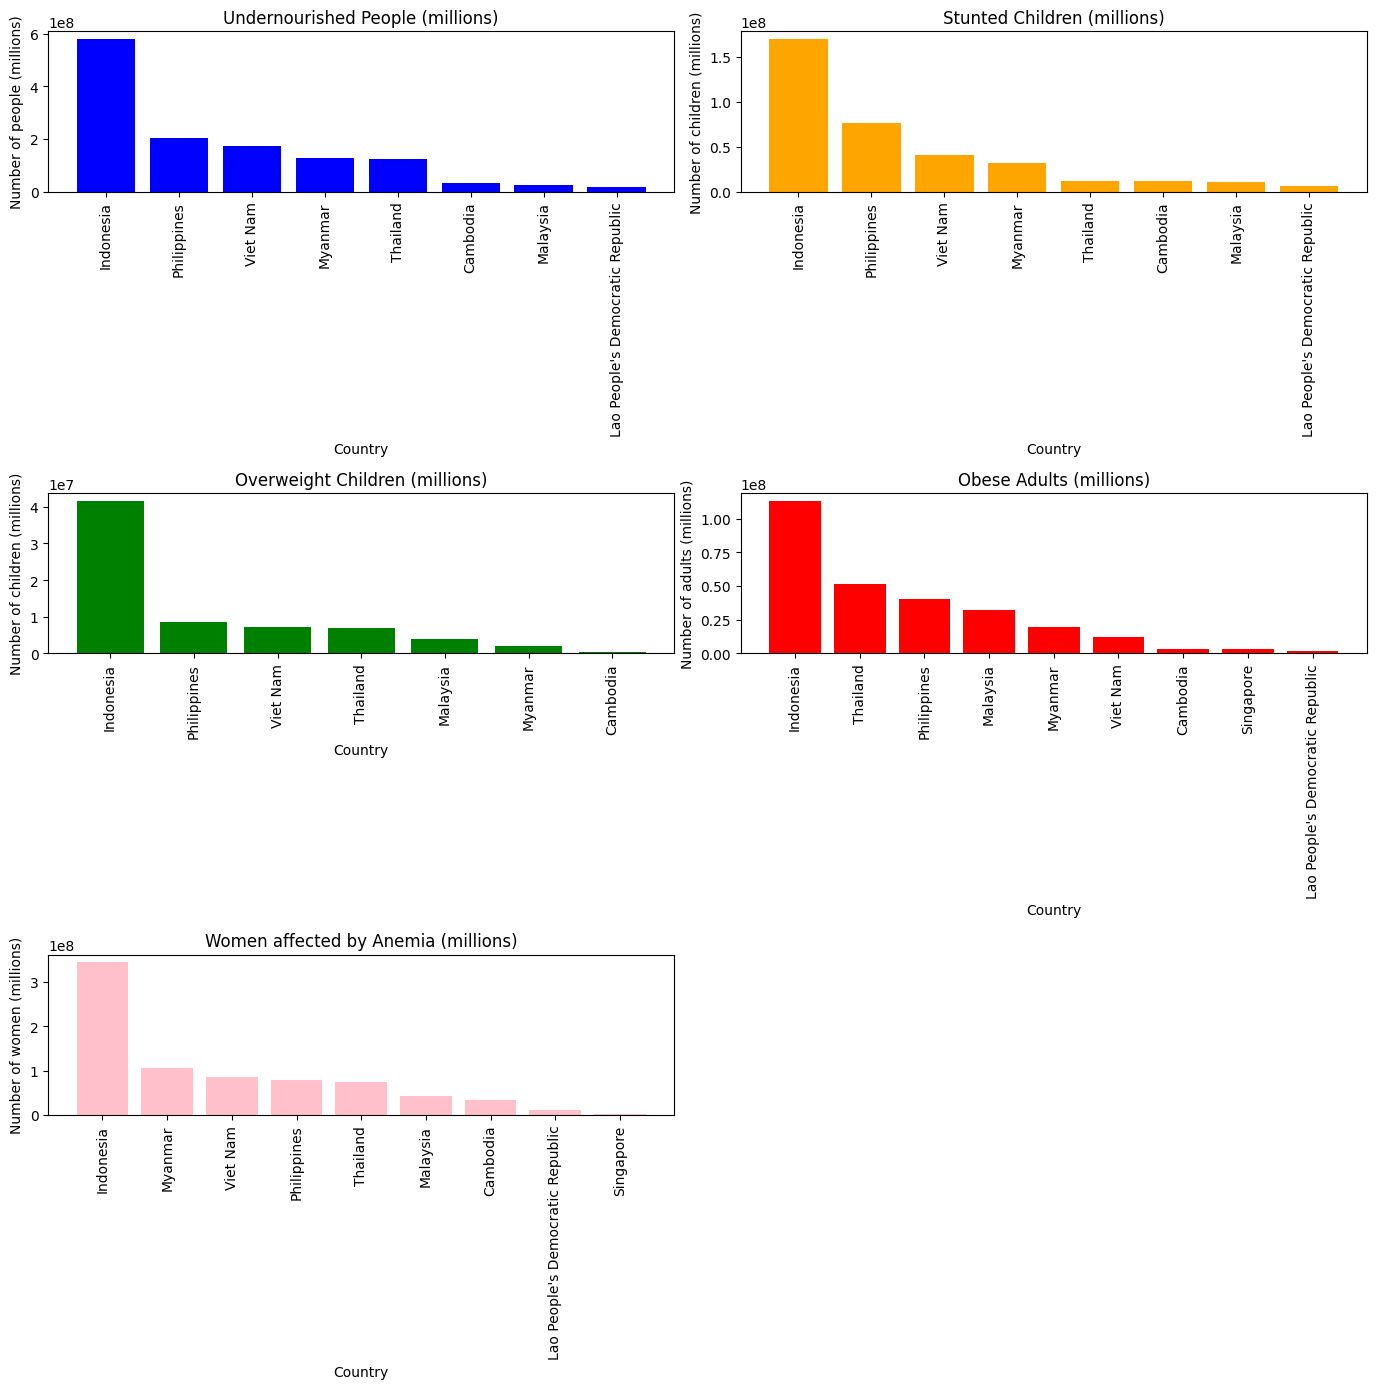

In [8]:
df3 = pd.read_csv('Cleaned Food Insecurity ASEAN.csv')

#call specific item from column "Item"
undernourished = df3[df3['Item'] == 'Number of people undernourished (million) (3-year average)']
stunted = df3[df3['Item'] == 'Number of children under 5 years of age who are stunted (modeled estimates) (million)']
overweight = df3[df3['Item'] == 'Number of children under 5 years of age who are overweight (modeled estimates) (million)']
obese = df3[df3['Item'] == 'Number of obese adults (18 years and older) (million)']
anemia = df3[df3['Item'] == 'Number of women of reproductive age (15-49 years) affected by anemia (million)']

#convert the value according to their own unit value
undernourished.loc[:, 'Value'] *= 1000000
stunted.loc[:, 'Value'] *= 1000000
overweight.loc[:, 'Value'] *= 1000000
obese.loc[:, 'Value'] *= 1000000
anemia.loc[:, 'Value'] *= 1000000

#group the data
undernourished_sum = undernourished.groupby('Area')['Value'].sum().sort_values(ascending=False)
stunted_sum = stunted.groupby('Area')['Value'].sum().sort_values(ascending=False)
overweight_sum = overweight.groupby('Area')['Value'].sum().sort_values(ascending=False)
obese_sum = obese.groupby('Area')['Value'].sum().sort_values(ascending=False)
anemia_sum = anemia.groupby('Area')['Value'].sum().sort_values(ascending=False)

pd.options.display.float_format = '{:,.0f}'.format

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 14))

#bar plot for undernourished
axes[0, 0].bar(undernourished_sum.index, undernourished_sum.values, color='blue')
axes[0, 0].set_title('Undernourished People (millions)')
axes[0, 0].set_xlabel('Country')
axes[0, 0].set_ylabel('Number of people (millions)')
axes[0, 0].tick_params(axis='x', rotation=90)

#bar plot for stunted children
axes[0, 1].bar(stunted_sum.index, stunted_sum.values, color='orange')
axes[0, 1].set_title('Stunted Children (millions)')
axes[0, 1].set_xlabel('Country')
axes[0, 1].set_ylabel('Number of children (millions)')
axes[0, 1].tick_params(axis='x', rotation=90)

#bar plot for overweight children
axes[1, 0].bar(overweight_sum.index, overweight_sum.values, color='green')
axes[1, 0].set_title('Overweight Children (millions)')
axes[1, 0].set_xlabel('Country')
axes[1, 0].set_ylabel('Number of children (millions)')
axes[1, 0].tick_params(axis='x', rotation=90)

#bar plot for obese adults
axes[1, 1].bar(obese_sum.index, obese_sum.values, color='red')
axes[1, 1].set_title('Obese Adults (millions)')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Number of adults (millions)')
axes[1, 1].tick_params(axis='x', rotation=90)

#bar plot for anemia
axes[2, 0].bar(anemia_sum.index, anemia_sum.values, color='pink')
axes[2, 0].set_title('Women affected by Anemia (millions)')
axes[2, 0].set_xlabel('Country')
axes[2, 0].set_ylabel('Number of women (millions)')
axes[2, 0].tick_params(axis='x', rotation=90)

#hide the empty subplot in the last row and second column
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

### Analysis and Insights

The bar charts are used to show the difference in the number of undernourished people, stunted children, overweight children, obese adults, and women affected by anemia in ASEAN countries. From the results, it can be concluded that Indonesia records the highest values for all five categories. Philippines records the second highest values for undernourished people, stunted children, overweight children, and obese adults, but is ranked fourth for women affected by anemia. The country with the second highest number of women affected by anemia is Myanmar, but is constantly in the mid-range for all the other categories. Singapore, Laos, and Cambodia are the countries with the lowest values for all categories, while Vietnam and Malaysia are consistenly in the middle-ranks. Thailand has the second highest number of obese adults, but is among the mid-range for the other categories.

### Implications

Countries like Indonesia and the Philippines, which exhibit the highest values in multiple categories, require appropriate interventions to improve food security, reduce malnutrition, and address specific health issues such as anemia and obesity. Myanmar's high rate of women affected by anemia necessitates focused health programs targeting women's nutrition and health. Singapore, Laos, and Cambodia, should focus on preventive measures and continuous monitoring to maintain their status and address any emerging issues promptly. Vietnam, Malaysia, and Thailand need to develop and implement comprehensive policies that handle all aspects of food security and nutrition. Thailand, in particular, should prioritize tackling adult obesity. Collaborative efforts and knowledge sharing can be beneficial for ASEAN countries to adress food security and the overall nutritional health of each country's population.

In [4]:
df4 = pd.read_csv('Cleaned Food Insecurity ASEAN.csv')

#call items from the Item column and covert its value
FI_totall = df4[df4['Item'] == 'Number of severely food insecure people (million) (3-year average)']
FI_totall.loc[:, 'Value'] *= 1000000
undernourishedd = df4[df4['Item'] == 'Number of people undernourished (million) (3-year average)']
undernourishedd.loc[:, 'Value'] *= 1000000
stuntedkids = df4[df4['Item'] == 'Number of children under 5 years of age who are stunted (modeled estimates) (million)']
stuntedkids.loc[:, 'Value'] *= 1000000
overweightkids = df4[df4['Item'] == 'Number of children under 5 years of age who are overweight (modeled estimates) (million)']
overweightkids.loc[:, 'Value'] *= 1000000
obeseadult = df4[df4['Item'] == 'Number of obese adults (18 years and older) (million)']
obeseadult.loc[:, 'Value'] *= 1000000
anemiawomen = df4[df4['Item'] == 'Number of women of reproductive age (15-49 years) affected by anemia (million)']
anemiawomen.loc[:, 'Value'] *= 100000

#taking the middle year in the 3 years interval
FI_totall.loc[:, 'Year'] = FI_totall['Year'].astype(str).apply(lambda x: int(x.split('-')[0]) + 1)
undernourishedd.loc[:, 'Year'] = undernourishedd['Year'].astype(str).apply(lambda x: int(x.split('-')[0]) + 1)

#group by 'Area' and 'Year'
FoodInsecure = FI_totall.groupby(['Area', 'Year'])['Value'].sum().reset_index()
anemiaa = anemiawomen.groupby(['Area', 'Year'])['Value'].sum().reset_index()
overweightt = overweightkids.groupby(['Area', 'Year'])['Value'].sum().reset_index()
stuntedd = stuntedkids.groupby(['Area', 'Year'])['Value'].sum().reset_index()
malnourished = undernourishedd.groupby(['Area', 'Year'])['Value'].sum().reset_index()
obesee = obeseadult.groupby(['Area', 'Year'])['Value'].sum().reset_index()

#convert 'Year' column to int 
FoodInsecure = FoodInsecure.copy() 
FoodInsecure['Year'] = FoodInsecure['Year'].astype(int)
anemiaa = anemiaa.copy() 
anemiaa['Year'] = anemiaa['Year'].astype(int)
overweightt = overweightt.copy() 
overweightt['Year'] = overweightt['Year'].astype(int)
stuntedd = stuntedd.copy() 
stuntedd['Year'] = stuntedd['Year'].astype(int)
malnourished = malnourished.copy() 
malnourished['Year'] = malnourished['Year'].astype(int)
obesee = obesee.copy() 
obesee['Year'] = obesee['Year'].astype(int)

#merge the dataframe
df_merged = FoodInsecure.merge(anemiaa, on=['Area', 'Year'], suffixes=('_FoodInsecure', '_anemia'))
df_merged = df_merged.merge(overweightt, on=['Area', 'Year'], suffixes=('_anemia', '_overweight'))
df_merged = df_merged.merge(stuntedd, on=['Area', 'Year'], suffixes=('_overweight', '_stunted'))
df_merged = df_merged.merge(malnourished, on=['Area', 'Year'], suffixes=('_stunted', '_malnourished'))
df_merged = df_merged.merge(obesee, on=['Area', 'Year'], suffixes=('_malnourished', '_obese'))

if 'Year' in df_merged.columns:
    df_merged.drop(columns=['Year'], inplace=True)
    
#remove non-numeric columns before calculating correlation
numeric_columns = df_merged.select_dtypes(include=[np.number]).columns.tolist()
data = df_merged[numeric_columns].copy()  # Make a copy to avoid the warning

#rename columns for clarity
data.rename(columns={
    'Value_FoodInsecure': 'Food Insecurity',
    'Value_anemia': 'Anemia Among Women',
    'Value_overweight': 'Overweight Kids',
    'Value_stunted': 'Stunted Kids',
    'Value_malnourished' : 'Undernourished People',
    'Value_obese': 'Obese Adults'
}, inplace=True)

#calculate and display the correlation matrix
correlation_matrix = data.corr()
correlation_matrix

Food Insecurity  Anemia Among Women  Overweight Kids  \
Food Insecurity               1.000000            0.314335         0.317914   
Anemia Among Women            0.314335            1.000000         0.999627   
Overweight Kids               0.317914            0.999627         1.000000   
Stunted Kids                  0.381890            0.996176         0.997372   
Undernourished People         0.212639            0.992282         0.993267   
Obese Adults                  0.184185            0.987954         0.985143   

                       Stunted Kids  Undernourished People  Obese Adults  
Food Insecurity            0.381890               0.212639      0.184185  
Anemia Among Women         0.996176               0.992282      0.987954  
Overweight Kids            0.997372               0.993267      0.985143  
Stunted Kids               1.000000               0.983866      0.971003  
Undernourished People      0.983866               1.000000      0.989655  
Obese Adults               0.971003               0.989655      1.000000

<Axes: >

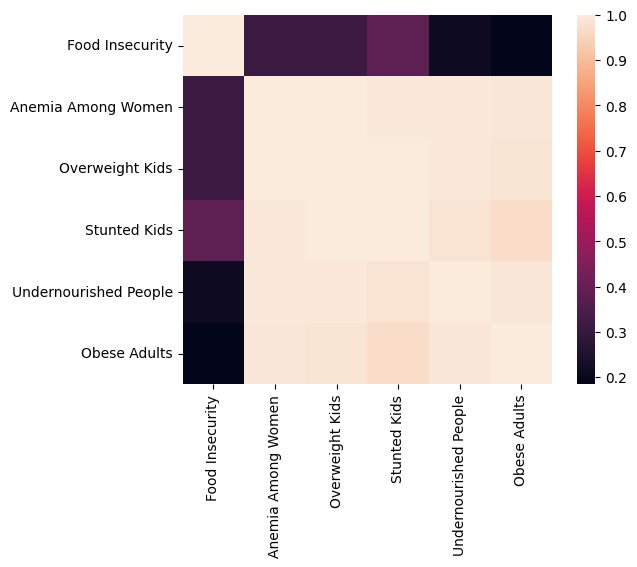

In [5]:
#create heatmap
%matplotlib inline

sns.heatmap(correlation_matrix, square = True)

### Analysis and Insights

A heatmap is used to depict the patterns between food insecurity, anemia among women, overweight kids, stunted kids, undernourished people, and obese adults. Grids with darker colours indicate a larger value for the variable in correspondence to the other variables. As seen from the created heatmap, countries with a larger population of undernourished people have a large food insecure population. The prevalence of obesity among adults also show a strong relation to food insecurity. Cases of overweight kids and anemia among women both have a significantly food insecure population, and the number of stunted kids in the countries have the lowest relation to food insecurity.

### Implications

The strong relation between both undernourishment and adult obesity with food insecurity indicates the presence of the double burden of malnutrition, where both undernutrition and overnutrition coexist. The significant correlation between overweight kids, anemia among women, and food insecurity underscores the need for holistic health programs to tackle cases of overnutrition and micronutrient deficiencies. Although the correlation between stunted kids and food insecurity is the lowest, stunting is a critical indicator of chronic malnutrition and poor developmental outcomes and should be avoided as much as possible. The interconnections between various indicators highlight the need for multi-sectoral strategies involving agriculture, health, education, and social protection to address the complex factors contributing to food insecurity and malnutrition.

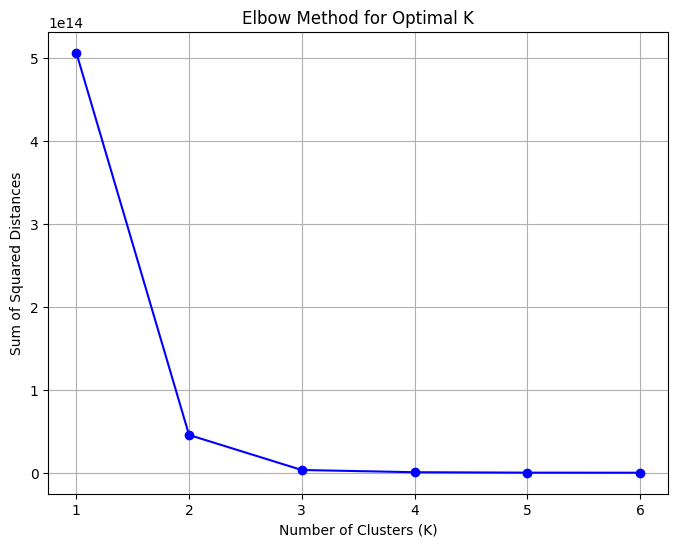

In [6]:
from sklearn.cluster import KMeans

#initialize an empty list to store SSE values for different K
sse = []

#define the range of K values to test
k_range = range(1, 7) 

#calculate SSE for each K
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)  

#plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.grid(True)
plt.show()

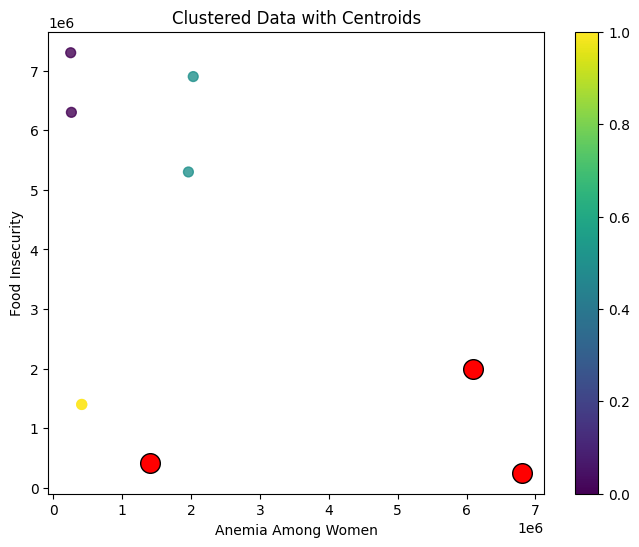

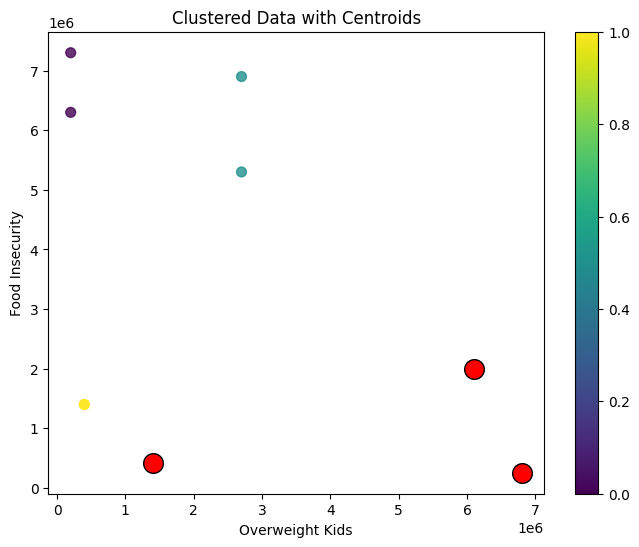

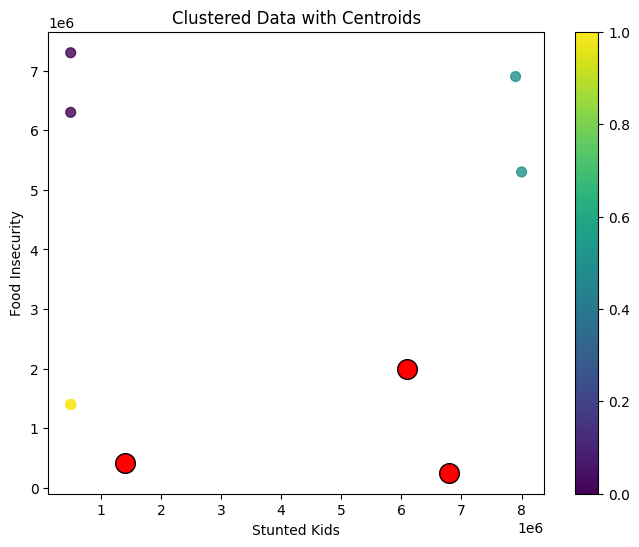

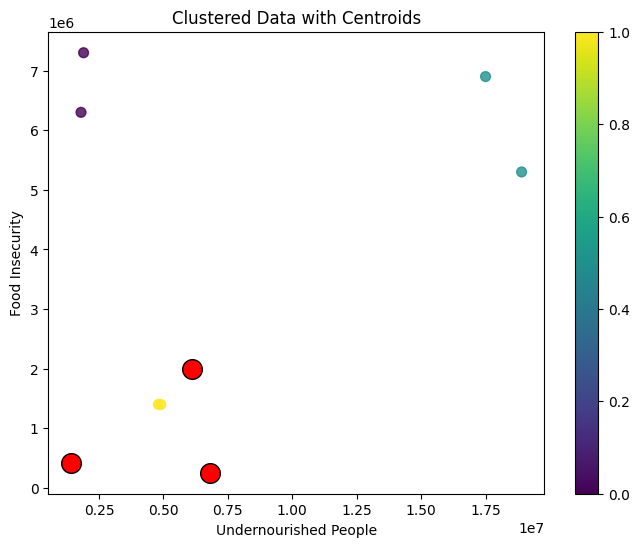

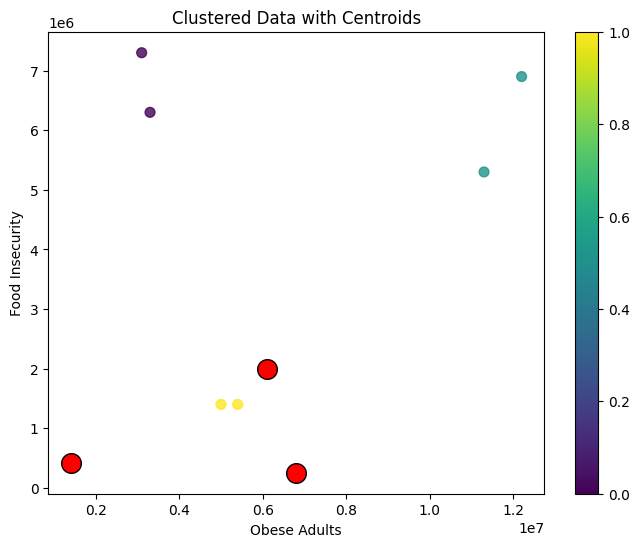

In [7]:
optimal_k = 3  #optimal K

#initialize KMeans with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data)  # Fit KMeans to your data

cluster_labels = kmeans.labels_
data['Cluster'] = cluster_labels
cluster_centers = kmeans.cluster_centers_
cluster_means = data.groupby('Cluster').mean()

plt.figure(figsize=(8, 6))
plt.scatter(data['Anemia Among Women'], data['Food Insecurity'], c=cluster_labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c='red', s=200, edgecolor='k')
plt.xlabel('Anemia Among Women')
plt.ylabel('Food Insecurity')
plt.title('Clustered Data with Centroids')
plt.colorbar()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(data['Overweight Kids'], data['Food Insecurity'], c=cluster_labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c='red', s=200, edgecolor='k')
plt.xlabel('Overweight Kids')
plt.ylabel('Food Insecurity')
plt.title('Clustered Data with Centroids')
plt.colorbar()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(data['Stunted Kids'], data['Food Insecurity'], c=cluster_labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c='red', s=200, edgecolor='k')
plt.xlabel('Stunted Kids')
plt.ylabel('Food Insecurity')
plt.title('Clustered Data with Centroids')
plt.colorbar()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(data['Undernourished People'], data['Food Insecurity'], c=cluster_labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c='red', s=200, edgecolor='k')
plt.xlabel('Undernourished People')
plt.ylabel('Food Insecurity')
plt.title('Clustered Data with Centroids')
plt.colorbar()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(data['Obese Adults'], data['Food Insecurity'], c=cluster_labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c='red', s=200, edgecolor='k')
plt.xlabel('Obese Adults')
plt.ylabel('Food Insecurity')
plt.title('Clustered Data with Centroids')
plt.colorbar()
plt.show()

### Analysis and Insights

We use the elbow method to determine the optimal number of clusters for using K-means as a way to analyse the data. As seen, the "elbow" forms when K=3, hence we will use three clusters in the K-means model. The larger red dots in the scatter plots indicate the centroid for each dataset, showing the average values for food insecurity and anemia among women, overweight kids, stunted kids, undernourished people, and obese adults. The clusters in all five scatter plots fall far from their respective centroids, implying a high variability within the clusters. Meaning, the data for anemia among women, overweight kids, stunted kids, undernourished people, and obese adults in relation to food insecurity is inherently diverse with several outliers in their clusters.

### Implications

The high variability within clusters suggests that the health and nutrition profiles of ASEAN countries are highly diverse. Countries within the same cluster do not exhibit uniform characteristics, implying that multiple factors influence the relationship between food insecurity and other variables. The presence of outliers represent countries with extreme values that do not conform to the general trends observed within their clusters. Given the diverse nature of the data, a singular approach to addressing food insecurity and related health issues might not be effective. Instead, targeted interventions that consider the specific circumstances of each country or subgroup within a cluster are necessary.

## 4. Food Insecurity Trends Prediction

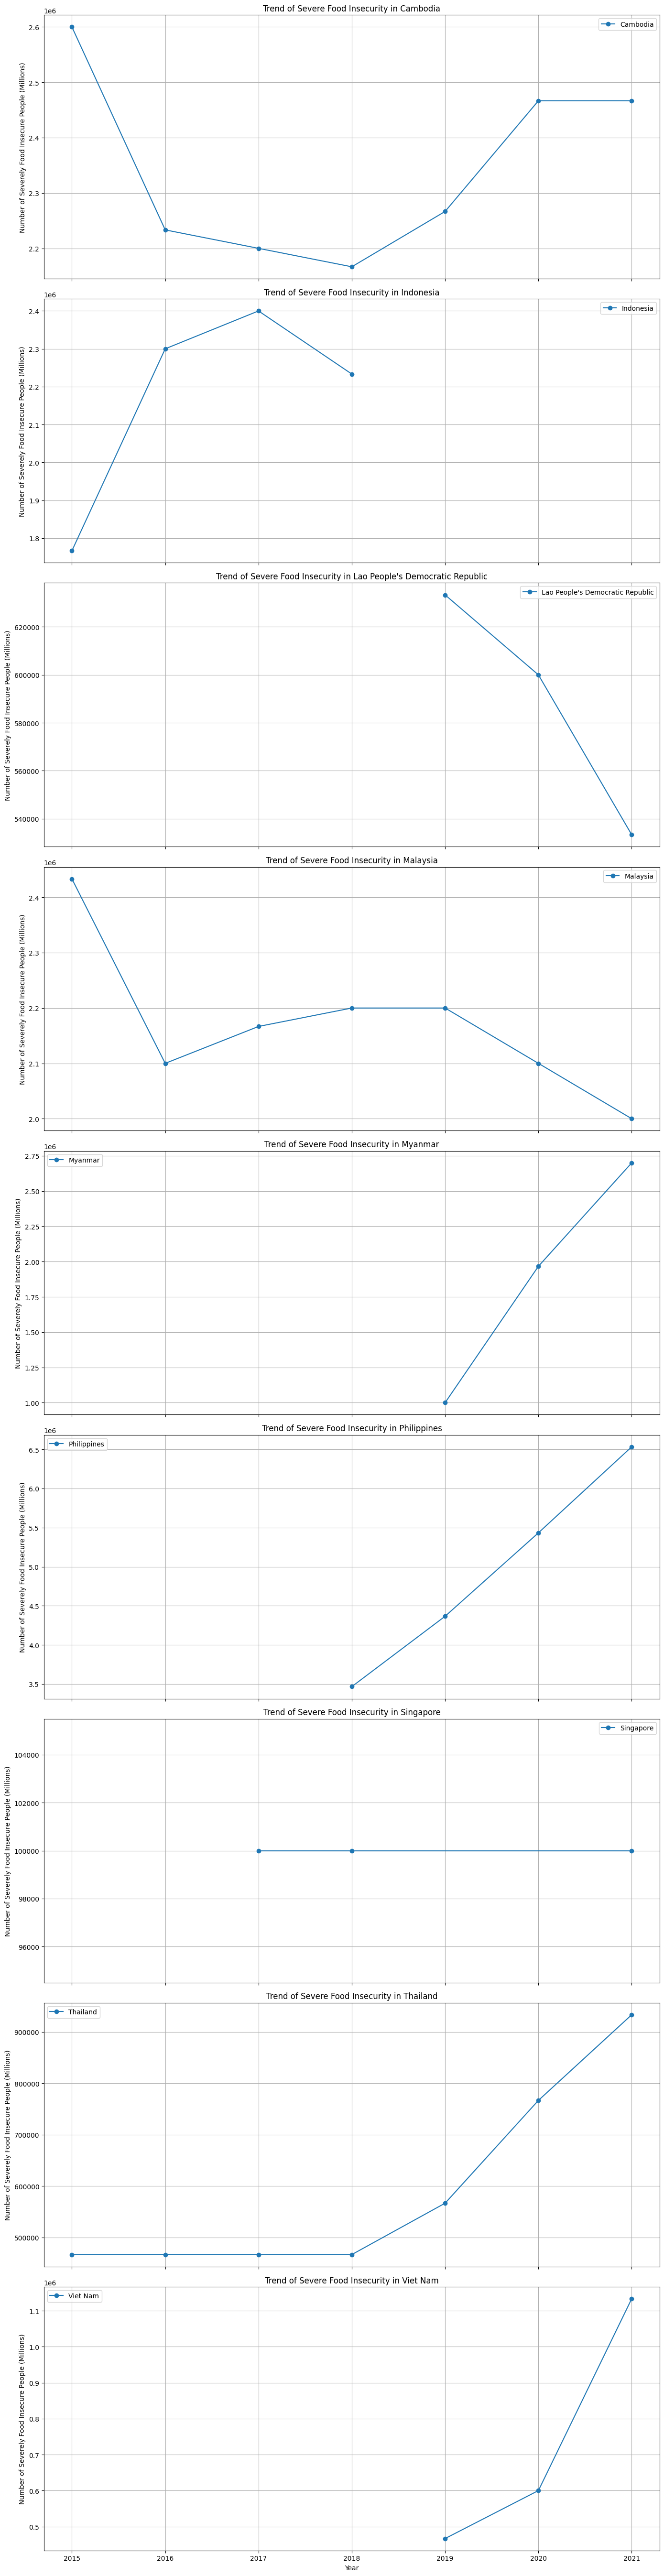

In [18]:
#group by 'Area' and 'Year' to calculate mean values 
FI_total_grouped = FI_total.groupby(['Area', 'Year'])['Value'].mean().reset_index()

#get the list of unique countries
countries = FI_total_grouped['Area'].unique()

#plotting each country's time series data in separate subplots
num_countries = len(countries)
fig, axes = plt.subplots(num_countries, 1, figsize=(14, 6*num_countries), sharex=True)

#plot each country's time series data
for i, country in enumerate(countries):
    country_data = FI_total_grouped[FI_total_grouped['Area'] == country]
    axes[i].plot(country_data['Year'], country_data['Value'], marker='o', label=country)
    axes[i].set_title(f'Trend of Severe Food Insecurity in {country}')
    axes[i].set_ylabel('Number of Severely Food Insecure People (Millions)')
    axes[i].grid(True)
    axes[i].legend()

#set common X-axis label and title
plt.xlabel('Year')
plt.tight_layout()
plt.show()

### Analysis and Insights

The graphs plotted show the severe food insecurity trends in every ASEAN country. Cambodia started with a large severely food insecure population, but the number started to decrease, and has only started to increase slightly in recent years. Indonesia's severely food insecure population has been on the rise over the years, but has recently begun to decrease. The number of severely food insecure people in Laos has been steadily decreasing. Malaysia started with a large severely food insecure population, but showed a significant decrease, followed by a slight increase and continuous decrease. As for Myanmar, the number of severely food insecure people has been on the rise as of late, and the same goes for the Philippines. Singapore shows a constant value for the severely food insecure population. Thailand started with a low and constant number of severely food insecure people, but records show the population has been growing larger in the last few years. Vietnam's severely food insecure population has also been on the rise from 2019. Brunei Darussalam is the only country not facing severe food insecurity.

There is significant variation in the trends of severe food insecurity across ASEAN countries, with countries like Cambodia and Laos making notable progress in reducing severe food insecurity. Malaysia also shows an overall downward trend despite recent fluctuations. Indonesia, Myanmar, the Philippines, Thailand, and Vietnam have experienced rising trends in severe food insecurity, whereas Singapore and Brunei continue to maintain their population's food security.

### Implications

The varying trends suggest that ASEAN countries require targeted and country-specific policies to address food insecurity. Countries with rising food insecurity, such as Indonesia, Myanmar, the Philippines, Thailand, and Vietnam, need immediate attention and intervention to reverse these trends. As for countries like Cambodia, Laos, and Malaysia, it is important to sustain and build upon the progress made. Targeted, data-driven policies, regional cooperation, and a focus on underlying socio-economic issues are key to addressing these disparities and ensuring food security for all ASEAN countries.

### Summary

In summary, 8 out of 10 ASEAN countries have a significant population that faces severe food insecurity, with many factors influencing the numbers. Economically prosperous countries like Brunei Darussalam and Singapore have little to zero cases of severe food insecurity. Unstable food supplies and varying minimum dietary requirements also effect the number of food insecure people. Severe food insecurity can lead to several health and nutritional issues, primarily among women and children. DBM, which is the coexistence of undernutrition and overnutrition in the same population, is also a consequence of lacking food security. Finally, by researching the food insecurity trends in recent years, we highlight the countries that require urgent interventions to improve their food security levels. By tackling food insecurity, we pave the way for healthier communities, a more prosperous society, and stable, thriving nations in the ASEAN region.